# Домашнее задание по статистическому анализу на python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr

Загрузить датасет по url:


In [19]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

World happiness gauged by technologies, social norms, and government policies. Dataset created by PromptCloud's web crawling solution.


*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [20]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country (region)           156 non-null object
Ladder                     156 non-null int64
SD of Ladder               156 non-null int64
Positive affect            155 non-null float64
Negative affect            155 non-null float64
Social support             155 non-null float64
Freedom                    155 non-null float64
Corruption                 148 non-null float64
Generosity                 155 non-null float64
Log of GDP
per capita      152 non-null float64
Healthy life
expectancy    150 non-null float64
dtypes: float64(8), int64(2), object(1)
memory usage: 13.5+ KB


In [5]:
df.Freedom.unique()

array([  5.,   6.,   3.,   7.,  19.,  11.,  10.,   8.,   9.,  26.,  17.,
        16.,  93.,  28.,  63.,  33.,  44.,  53.,  62.,  58.,   4.,  12.,
        71.,  69., 102.,  98.,  25.,  68.,  nan,  95.,  32.,  84.,  30.,
        20.,  74., 132.,  24., 108.,  51.,  52.,   1., 122.,  56.,  13.,
        70.,  50.,  54.,  57.,  81.,  42.,  47.,  18., 126., 144.,  45.,
        49.,  40.,  64.,  39.,  80.,  35., 138.,  34.,  77.,  61.,  37.,
       114., 107.,  15., 124., 128.,  79., 139.,  86., 118.,  66.,  43.,
       137., 140.,  36., 131., 150., 112., 105.,  75.,  38.,  83., 149.,
        76., 101., 136.,  48.,  31.,  23.,  59.,  90., 115.,  91., 100.,
        67.,  88., 103.,  92., 119.,  22.,  85.,  87., 145.,   2., 134.,
       121.,  14.,  82., 111., 127., 123., 117., 109., 104.,  89.,  72.,
       151.,  46., 143.,  27., 130., 125., 110., 116.,  55.,  29., 142.,
       141., 106., 113.,  99., 129.,  73., 120.,  41.,  94., 148., 146.,
        97., 135.,  96., 152.,  60., 153.,  65., 14

In [21]:
df3 = df.drop(df[df.Ladder == 29].index)

Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

**Оба распределения похожи на равномерные. При разбиении на 10 интервалов, каждый из них встречается 15-16 раз**

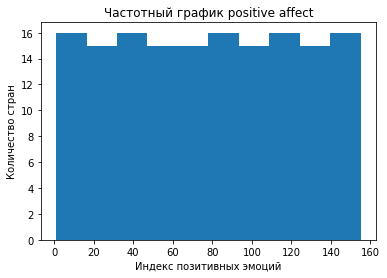

In [7]:
positive_af = df3['Positive affect']
plt.hist(positive_af, 10)
plt.xlabel('Индекс позитивных эмоций')
plt.ylabel('Количество стран')
plt.title('Частотный график positive affect')
plt.show()

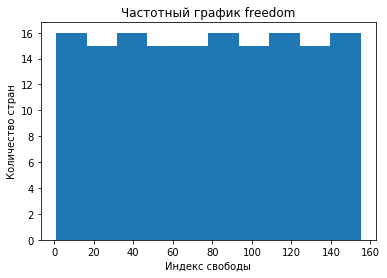

In [8]:
freedom = df3['Freedom']
plt.hist(freedom, 10)
plt.xlabel('Индекс свободы')
plt.ylabel('Количество стран')
plt.title('Частотный график freedom')
plt.show()

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [9]:
print(f"Медиана: {statistics.median(freedom)}")
print(f"Математическое ожидание: {statistics.mean(freedom)}")
print(f"СКО: {round(statistics.pstdev(freedom),1)}")
print(f"Минимум: {freedom.min()}")
print(f"Максимум: {freedom.max()}")
print(f"Размах: {freedom.max() - freedom.min()}")

Медиана: 78.0
Математическое ожидание: 78.0
СКО: 44.7
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

**Коэффициент Пирсона равен 0.68, что означает, что линейная связь заметная, а то, положительный коэф. указывает на то, что связь прямая.**

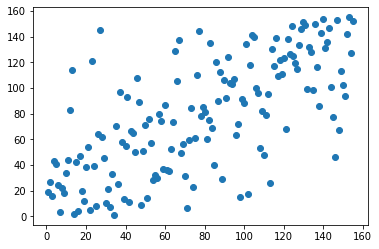

In [10]:
plt.scatter(freedom, positive_af)

In [11]:
corr, p_value = pearsonr(freedom, positive_af)
print(corr)

0.6817698430601656


Нормализовать данные колонки Freedom (централизация + масштабирование)

In [12]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [13]:
print(min(freedom_1))
print(max(freedom_1))

-77.0
77.0


In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

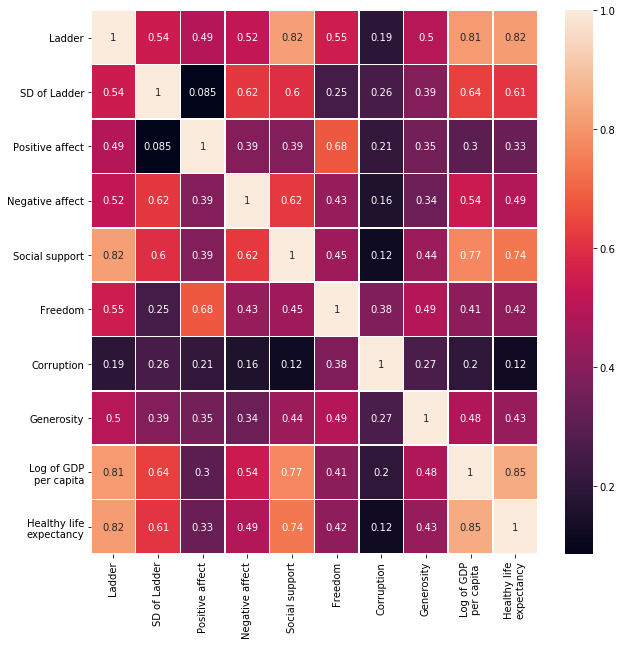

In [15]:
import seaborn as sns
sns.heatmap(df3.corr(), annot=True, linewidths=0.5)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Загрузить следующую таблицу: 

In [17]:
import io
import requests
url="http://yustiks.ru/avocado.csv"
avocado = pd.read_csv(url)
avocado[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


In [24]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Сделать частотный график колонки AveragePrice. Какое это распределение?

**Распределение похоже на нормальное с пиком средней цены в 1-1.5 у.е.**

Text(0.5, 1.0, 'Частотный график средней цены авокадо')

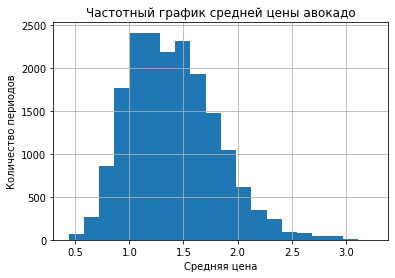

In [29]:
av_price = avocado['AveragePrice']
plt.hist(av_price, 20)
plt.grid()
plt.xlabel('Средняя цена')
plt.ylabel('Количество периодов')
plt.title('Частотный график средней цены авокадо')

Найти корреляцию в следующих колонках:

Корелляция между: 4046 - Total number of avocados with PLU 4046 sold  и например Average Price. Если корелляция есть, то скорее всего, данный вид авокадо дорогой по цене и он влияет на среднюю стоимость.

**Коэфф. корреляции отрицательный, что означает, что, наоборот, при увеличении цены на сорт 4046, средняя цена уменьшается. Но, так как значение коэф. менее 0.3, то корреляция слабая и делать выводы не стоит.**

In [33]:
PLU_4046 = avocado['4046']
corr, p_value = pearsonr(PLU_4046, av_price)
print(corr)

-0.20831704848788477
